### K-Means Algorithm

After learning how to implement K-means algorithm, in this notebook, we want to test our model which is written from scratch
to test if that works properly. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from KMeans import KMeans as scr_KMeans
from sklearn.cluster import KMeans

We use the Mall **Customer Segmentation Data** dataset from kaggle to test our algorithm. You can find that in [this](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python) link.

In [2]:
df = pd.read_csv('../../data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


We Know that we can only use numerical data as inputs for our main K-means algorithm. 

Also, At first to get a better intuition, We first use only two numerical 
features and plot them, and also run our algorithm on them to divide them to a proper number of clusters, and after that, we do that again for more features. 

In [4]:
features = ['Annual Income (k$)', 'Spending Score (1-100)']
new_df = df[features]
new_df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


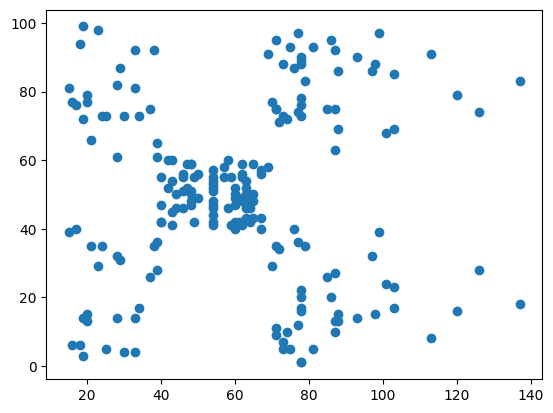

In [5]:
plt.scatter(new_df['Annual Income (k$)'], new_df['Spending Score (1-100)'])
plt.show()

We can see that one way to cluster these points is to divide them between 5 clusters. Let's see does our algorithm agree with us and work as expected?

In [6]:
kmeans = scr_KMeans()
predictions = kmeans.fit_predict(new_df, 5, max_iter=100)

Let's see the labels for our first ten training examples:

In [7]:
predictions[:10]

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

#### Ploting the clusters
Now let's see if our algorithm has detected the five clusters and the centroids of them correctly or not:

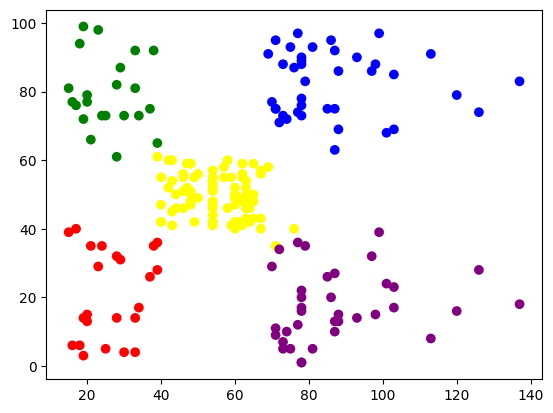

In [8]:
colors = ['red', 'green', 'blue', 'yellow', 'purple']
plt.scatter(new_df['Annual Income (k$)'], new_df['Spending Score (1-100)'], c=[colors[prediction] for prediction in predictions])
plt.show()

It's abvious that our algorithm is doing well and it's working correctly!

### Comparing to scikit-learn K-means
We can also compare our result with the results we get from scikit-learn library K-means algorithm. Let's do that:

In [9]:
kmeans_sklearn = KMeans(n_clusters=5, max_iter=100, n_init=100)
predictions_sklearn = kmeans_sklearn.fit_predict(new_df)

In [10]:
predictions_sklearn[:10]

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0], dtype=int32)

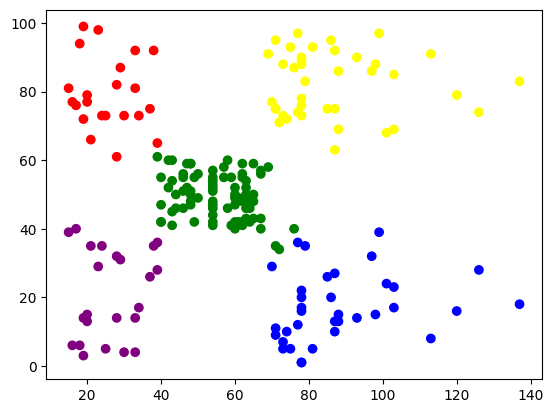

In [11]:
plt.scatter(new_df['Annual Income (k$)'], new_df['Spending Score (1-100)'], c=[colors[prediction] for prediction in predictions_sklearn])
plt.show()

#### Done!
The results are exactly the same!